# Mini proyecto de planetas

### $\mathbb{R} i \vec c \hbar$

## Datos del sistema solar

| Planeta | Distancia al Sol [UA] | Masa [MT] | Periodo [a] | Vel. orbital [UA/a]|
|---|:-:|:-:|:-:|:--|
| Mercurio | 0.39 | 0.06 | 0.24 | 1.625 | 
| Venus | 0.72 | 0.82 | 0.615 | 1.170 |
| Tierra | 1 | 1 | 1 | 1 |
| Marte | 1.52 | 0.11 | 1.88 | 0.808 |
| Júpiter | 5.2 | 318 | 11.86 | 0.438 |
| Saturno | 9.54 | 95 | 29.46 | 0.323 |
| Urano | 19.19 | 14.6 | 84.01 | 0.228 |
| Neptuno | 30.06 | 17.2 | 164.79 | 0.182 |


Los datos que se muestran están unidades astronómicas.

In [1]:
from pylab import *
from scipy.integrate import *

$$
\frac{d^2}{d \tau ^2} \vec r_p =  - \frac{\hat r_p}{r_p ^2} \\
\frac{d^2}{d \tau ^2} \vec r_T =  - \frac{\hat r_T}{r_T ^2} 
$$

In [4]:
def mov_p(t,x_v,mus=[0,0]):
    # x_v = [ xP , yP , dxP , dyP ]
    #         0    1     2    3 
    # Planeta
    dxP = x_v[2]
    dyP = x_v[3]
    RP23 = (x_v[0]**2 + x_v[1]**2)**1.5
    ddxP = - x_v[0] / RP23
    ddyP = - x_v[1] / RP23
    return array([dxP,dyP,ddxP,ddyP])

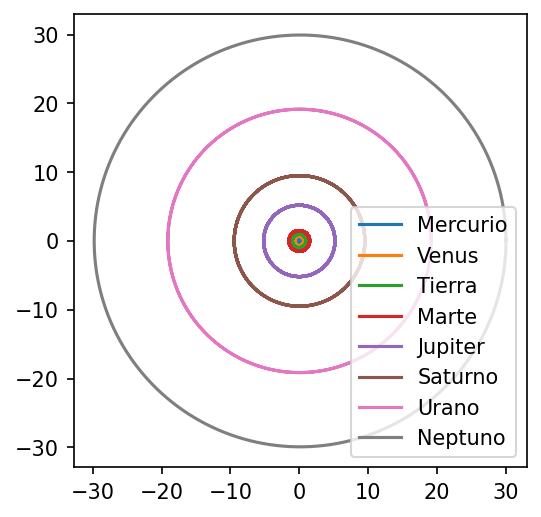

In [45]:
planeta = ['Mercurio','Venus','Tierra','Marte','Jupiter','Saturno','Urano','Neptuno']
d_p = array([0.39,0.72,1,1.52,5.2,9.54,19.19,30.06])
v_p = array([1.625,1.17,1,0.808,0.438,0.323,0.228,0.182])

figure(dpi=150)
intervalo_t = (0,164*2*pi)
N_t = 40000
t = linspace(intervalo_t[0],intervalo_t[-1],N_t)
trayectorias = zeros((len(planeta),N_t,2))
for i in range(len(planeta)):
    CI = array([d_p[i],0,0,v_p[i]])
    sol = solve_ivp(mov_p,intervalo_t,CI,rtol=1e-8, atol=1e-8,
                    dense_output=True)
    plot(sol.sol(t)[0],sol.sol(t)[1],label='%s' %planeta[i])
    trayectorias[i,:,0] = sol.sol(t)[0] #componentes x de cada planeta
    trayectorias[i,:,1] = sol.sol(t)[1] #componentes y de cada planeta
legend()
gca().set_aspect('equal')
show()

In [46]:
def dist_1_2(tray1,tray2):
    d = sqrt( (tray1[0]-tray2[0])**2 + (tray1[1]-tray2[1])**2 )
    return d

Promedio Mercurio - Tierra: 	 1.040832829047421
Promedio Venus - Tierra:	 1.1296678704893872
Promedio Marte - Tierra:	 1.6791983202842289


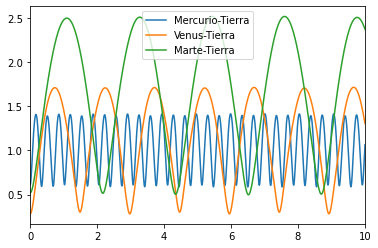

In [62]:
d_Mer_T = dist_1_2([trayectorias[0,:,0],trayectorias[0,:,1]],
                     [trayectorias[2,:,0],trayectorias[2,:,1]])
print('Promedio Mercurio - Tierra: \t',mean(d_Mer_T))
d_Ven_T = dist_1_2([trayectorias[1,:,0],trayectorias[1,:,1]],
                     [trayectorias[2,:,0],trayectorias[2,:,1]])
print('Promedio Venus - Tierra:\t',mean(d_Ven_T))
d_Mar_T = dist_1_2([trayectorias[3,:,0],trayectorias[3,:,1]],
                     [trayectorias[2,:,0],trayectorias[2,:,1]])
print('Promedio Marte - Tierra:\t',mean(d_Mar_T))

plot(t/(2*pi),d_Mer_T,label='Mercurio-Tierra')
plot(t/(2*pi),d_Ven_T,label='Venus-Tierra')
plot(t/(2*pi),d_Mar_T,label='Marte-Tierra')
xlim([0,10])
legend()
show()